In [1]:
import pandas as pd

# Load the dataset
file_path = 'processed_airline_tweets.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display key stats and sample rows
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

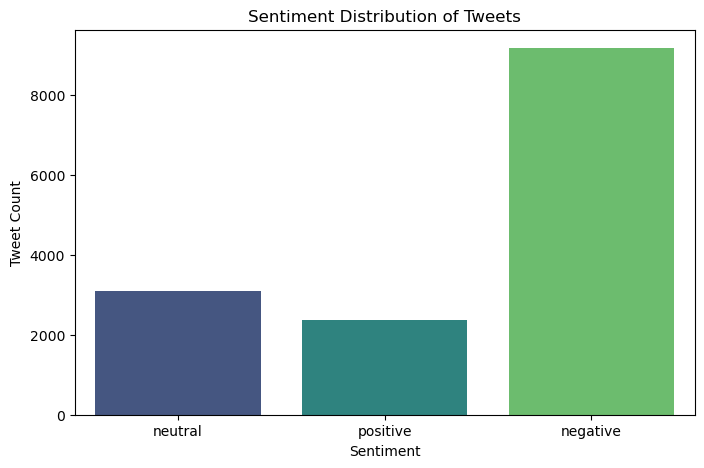

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='airline_sentiment', palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


In [4]:
pip install wordcloud



   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/299.9 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 751.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 751.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 751.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/299.9 kB 656.4 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/299.9 kB 728.8 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/299.9 kB 728.8 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/299.9 kB 713.1 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/299.9 kB 713.1 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/299.9 kB

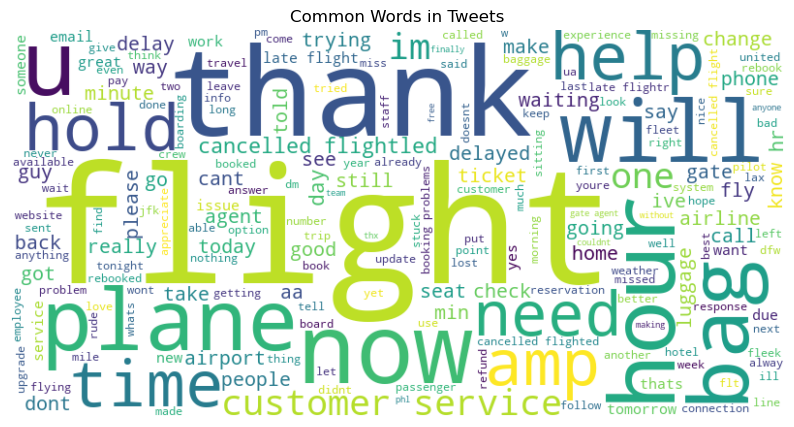

In [6]:
from wordcloud import WordCloud

# Generate WordCloud using cleaned_text
text = ' '.join(data['cleaned_text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Tweets')
plt.show()


In [7]:
from textblob import TextBlob

def analyze_sentiment(text):
    """Analyze sentiment polarity using TextBlob."""
    if pd.isnull(text):
        return "Neutral"
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    else:
        return "Negative"

# Generate sentiment for cleaned_text
data['Generated_Sentiment'] = data['cleaned_text'].apply(analyze_sentiment)

# Compare sentiments
print(data[['custom_sentiment', 'Generated_Sentiment']].head())


  custom_sentiment Generated_Sentiment
0          Neutral             Neutral
1          Neutral             Neutral
2         Negative            Negative
3         Positive            Positive
4         Negative            Negative


In [8]:
# Save the updated dataset with regenerated sentiment
output_file = 'updated_airline_tweets.csv'
data.to_csv(output_file, index=False)
print(f"Updated data saved to {output_file}.")


Updated data saved to updated_airline_tweets.csv.
